In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# Creating columns as shown in the Data Dictionary
labels = ['A' + str(i) for i in range(1,17)]
print(labels)

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']


In [3]:
# Loading dataset and assigning new columns to it
data = pd.read_csv('crx.data', names=labels)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
#Checking if we have nan values in our dataset
data.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

The above results shows that there are no NaN values in our dataset

In [5]:
# Checking datatypes of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [6]:
# A function that prints components of individual categorical columns
categorical = ['A1','A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
def printComponents(cols, df): 
    for col in categorical:
        print(f"Components of {col} are: {df[col].unique()}")   

In [7]:
# Calling the function to print components of the columns
printComponents(categorical, data)

Components of A1 are: ['b' 'a' '?']
Components of A4 are: ['u' 'y' '?' 'l']
Components of A5 are: ['g' 'p' '?' 'gg']
Components of A6 are: ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']
Components of A7 are: ['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']
Components of A9 are: ['t' 'f']
Components of A10 are: ['t' 'f']
Components of A12 are: ['f' 't']
Components of A13 are: ['g' 's' 'p']


In [8]:
# A function that checks the number of times components appear in our categorical columns
def numberComponents(cols, df):
    for col in categorical:
        print(f"{col}: {df[col].value_counts()}")

In [9]:
# Calling the function to print the components
numberComponents(categorical, data)

A1: b    468
a    210
?     12
Name: A1, dtype: int64
A4: u    519
y    163
?      6
l      2
Name: A4, dtype: int64
A5: g     519
p     163
?       6
gg      2
Name: A5, dtype: int64
A6: c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64
A7: v     399
h     138
bb     59
ff     57
?       9
z       8
j       8
dd      6
n       4
o       2
Name: A7, dtype: int64
A9: t    361
f    329
Name: A9, dtype: int64
A10: f    395
t    295
Name: A10, dtype: int64
A12: f    374
t    316
Name: A12, dtype: int64
A13: g    625
s     57
p      8
Name: A13, dtype: int64


In [10]:
# Droping the NaN values
df2 = data[(data['A1']!='?') & (data['A6']!='?') & (data['A7']!='?')]
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [11]:
# Calling the function to print the components after removing NaN values
printComponents(categorical, df2)

Components of A1 are: ['b' 'a']
Components of A4 are: ['u' 'y' 'l']
Components of A5 are: ['g' 'p' 'gg']
Components of A6 are: ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
Components of A7 are: ['v' 'h' 'bb' 'ff' 'j' 'z' 'o' 'dd' 'n']
Components of A9 are: ['t' 'f']
Components of A10 are: ['t' 'f']
Components of A12 are: ['f' 't']
Components of A13 are: ['g' 's' 'p']


In [12]:
# Calling the function to print the components after removing NaN values
numberComponents(categorical, df2)

A1: b    463
a    208
Name: A1, dtype: int64
A4: u    510
y    159
l      2
Name: A4, dtype: int64
A5: g     510
p     159
gg      2
Name: A5, dtype: int64
A6: c     135
q      76
w      63
i      58
ff     53
aa     53
k      50
cc     40
x      38
m      38
d      30
e      24
j      10
r       3
Name: A6, dtype: int64
A7: v     392
h     137
bb     57
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: A7, dtype: int64
A9: t    358
f    313
Name: A9, dtype: int64
A10: f    379
t    292
Name: A10, dtype: int64
A12: f    360
t    311
Name: A12, dtype: int64
A13: g    614
s     55
p      2
Name: A13, dtype: int64


In [13]:
# Checking data-types of our dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      671 non-null    object 
 1   A2      671 non-null    object 
 2   A3      671 non-null    float64
 3   A4      671 non-null    object 
 4   A5      671 non-null    object 
 5   A6      671 non-null    object 
 6   A7      671 non-null    object 
 7   A8      671 non-null    float64
 8   A9      671 non-null    object 
 9   A10     671 non-null    object 
 10  A11     671 non-null    int64  
 11  A12     671 non-null    object 
 12  A13     671 non-null    object 
 13  A14     671 non-null    object 
 14  A15     671 non-null    int64  
 15  A16     671 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 89.1+ KB


In [14]:
# Checking index number of column A2 that contains NaN values
df3 = df2[df2['A2']=='?']
df3.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


In [15]:
# Checking most commonly observed value in the dataset
df2.mode()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,?,1.5,u,g,c,v,0.0,t,f,0,f,g,00000,0,-


In [16]:
# Checking how many times we have NaN values in column A2
len(df2[df2['A14']=='?'])

7

In [17]:
# Checking shape of the dataset
df2.shape

(671, 16)

In [18]:
# Checking for an index where both A2 and A14 have a NaN value
df3 = df2[(df2['A2']=='?') & (df2['A14']=='?')]
df3

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
445,a,?,11.25,u,g,ff,ff,0.0,f,f,0,f,g,?,5200,-


In [19]:
# Dropping the index where both A2 and A14 have NaN value
df4 = df2.drop([df2.index[445]])

In [20]:
df4.shape

(670, 16)

In [21]:
df4.mode()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,?,1.5,u,g,c,v,0.0,t,f,0,f,g,00000,0,-


In [22]:
# Dropping the NaN values in A2
df5 = df4[df4['A2']!='?']
df5.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [23]:
len(df5[df4['A14']=='?'])

<ipython-input-23-7a30365146b0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df5[df4['A14']=='?'])


6

In [24]:
# Replacing the NaN values with the most common value in A14
df6 = df5.replace(["?"], "00000")
df6.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [25]:
# Changing numeric columns to floats
df6[['A2','A11','A14','A15']] = df6[['A2','A11','A14','A15']].astype(float)

In [26]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      658 non-null    object 
 1   A2      658 non-null    float64
 2   A3      658 non-null    float64
 3   A4      658 non-null    object 
 4   A5      658 non-null    object 
 5   A6      658 non-null    object 
 6   A7      658 non-null    object 
 7   A8      658 non-null    float64
 8   A9      658 non-null    object 
 9   A10     658 non-null    object 
 10  A11     658 non-null    float64
 11  A12     658 non-null    object 
 12  A13     658 non-null    object 
 13  A14     658 non-null    float64
 14  A15     658 non-null    float64
 15  A16     658 non-null    object 
dtypes: float64(6), object(10)
memory usage: 87.4+ KB


In [27]:
#Writing the dataframe to a csv file
df6.to_csv('emukeshi_project.csv')

In [28]:
# Checking for outliers and the distribution of the dataset
df6.describe()

,A2,A3,A8,A11,A14,A15
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,31.460198,4.852804,2.248959,2.503040,178.299392,1047.537994
std,11.819448,5.024074,3.384788,4.954357,168.187735,5328.891874
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,64.000000,0.000000
50%,28.290000,2.875000,1.000000,0.000000,155.000000,5.000000
75%,38.230000,7.530000,2.615000,3.000000,260.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [29]:
# Finding the relationship between variables
cor = df6.corr()
cor

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.214476,0.414934,0.197147,-0.081981,0.020883
A3,0.214476,1.000000,0.293779,0.266818,-0.220137,0.120306
A8,0.414934,0.293779,1.000000,0.323586,-0.067057,0.051592
A11,0.197147,0.266818,0.323586,1.000000,-0.113705,0.061250
A14,-0.081981,-0.220137,-0.067057,-0.113705,1.000000,0.065852
A15,0.020883,0.120306,0.051592,0.061250,0.065852,1.000000


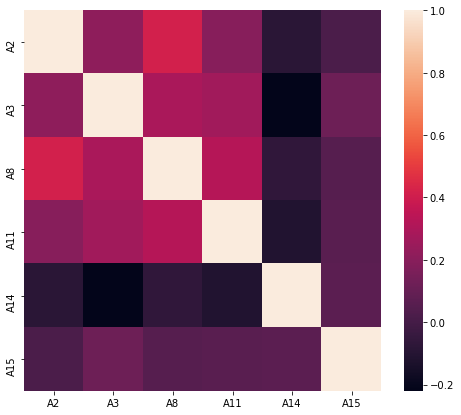

In [30]:
# Plotting the relationship of the variables
plt.figure(figsize=(8,7))
ax = sns.heatmap(cor)

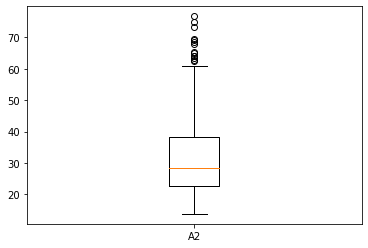

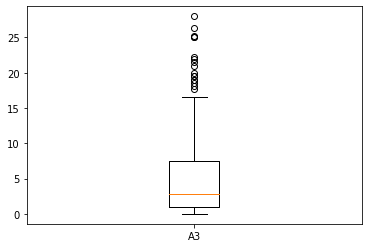

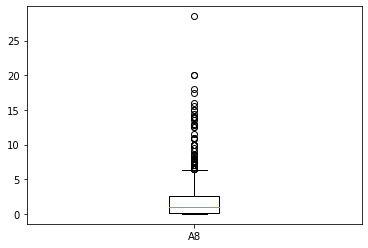

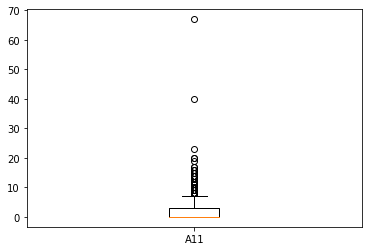

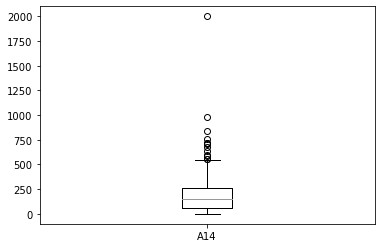

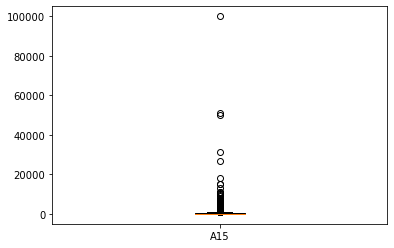

In [31]:
# Ploting boxPlot of numerical columns so as to detect outliers

for col in df6:
    if df6[col].dtypes == 'float64':
        plt.boxplot(df6[col])
        plt.xticks([1], [col])
        plt.show()

# Removing Outliers

In [32]:
# Finding upper bound of column A15, we will consider 95% quantile
max_threshold = df6["A15"].quantile(0.95)
max_threshold

4166.3499999999985

In [33]:
# Finding lower bound of columns A15, we will consider 5% quantile
min_threshold = df6["A15"].quantile(0.05)
min_threshold

0.0

In [34]:
# Removing outliers from the dataset
df7 = df6[df6['A15']<max_threshold]
df7.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [35]:
# Finding upper bound of column A11, we will consider 95% quantile
max_threshold_11 = df7["A11"].quantile(0.95)
max_threshold_11

11.0

In [36]:
# Finding lower bound of columns A11, we will consider 5% quantile
min_threshold_11 = df7["A11"].quantile(0.05)
min_threshold_11

0.0

In [37]:
# Removing outliers from the dataset
df9 = df7[df7['A11']<max_threshold_11]
df9.shape

(580, 16)

In [38]:
df_final = df9
df_final.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [39]:
# Encoding using one-hot Encoding
df_encoded = pd.get_dummies(data=df_final[['A1','A4','A5','A6','A7','A9','A10','A12','A13']], prefix=['A1','A4','A5','A6','A7','A9','A10','A12','A13'])
df_encoded.head()

,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1


In [40]:
# Checking shape of updated dataset
df_encoded.shape

(580, 40)

In [41]:
# Droping original columns that we encoded
df_final2 = df_final.drop(['A1','A4','A5','A6','A7','A9','A10','A12','A13'], axis=1)
df_final2.head()

,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.000,1.25,1.0,202.0,0.0,+
1,58.67,4.460,3.04,6.0,43.0,560.0,+
2,24.50,0.500,1.50,0.0,280.0,824.0,+
3,27.83,1.540,3.75,5.0,100.0,3.0,+
4,20.17,5.625,1.71,0.0,120.0,0.0,+


In [42]:
df_final2.shape

(580, 7)

In [43]:
# Combining numerical columns and encoded columns
df_hotted = pd.concat([df_final2, df_encoded], axis=1)
df_hotted.head()

,A2,A3,A8,A11,A14,A15,A16,A1_a,A1_b,A4_l,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1.0,202.0,0.0,+,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6.0,43.0,560.0,+,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0.0,280.0,824.0,+,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5.0,100.0,3.0,+,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0.0,120.0,0.0,+,0,1,0,...,0,0,1,1,0,1,0,0,0,1


In [44]:
df_hotted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 689
Data columns (total 47 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      580 non-null    float64
 1   A3      580 non-null    float64
 2   A8      580 non-null    float64
 3   A11     580 non-null    float64
 4   A14     580 non-null    float64
 5   A15     580 non-null    float64
 6   A16     580 non-null    object 
 7   A1_a    580 non-null    uint8  
 8   A1_b    580 non-null    uint8  
 9   A4_l    580 non-null    uint8  
 10  A4_u    580 non-null    uint8  
 11  A4_y    580 non-null    uint8  
 12  A5_g    580 non-null    uint8  
 13  A5_gg   580 non-null    uint8  
 14  A5_p    580 non-null    uint8  
 15  A6_aa   580 non-null    uint8  
 16  A6_c    580 non-null    uint8  
 17  A6_cc   580 non-null    uint8  
 18  A6_d    580 non-null    uint8  
 19  A6_e    580 non-null    uint8  
 20  A6_ff   580 non-null    uint8  
 21  A6_i    580 non-null    uint8  
 22  A6

In [45]:
# Selecting the independed variables and changing them to floats
X = df_hotted.drop('A16', axis=1)
X = X.astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 689
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      580 non-null    float64
 1   A3      580 non-null    float64
 2   A8      580 non-null    float64
 3   A11     580 non-null    float64
 4   A14     580 non-null    float64
 5   A15     580 non-null    float64
 6   A1_a    580 non-null    float64
 7   A1_b    580 non-null    float64
 8   A4_l    580 non-null    float64
 9   A4_u    580 non-null    float64
 10  A4_y    580 non-null    float64
 11  A5_g    580 non-null    float64
 12  A5_gg   580 non-null    float64
 13  A5_p    580 non-null    float64
 14  A6_aa   580 non-null    float64
 15  A6_c    580 non-null    float64
 16  A6_cc   580 non-null    float64
 17  A6_d    580 non-null    float64
 18  A6_e    580 non-null    float64
 19  A6_ff   580 non-null    float64
 20  A6_i    580 non-null    float64
 21  A6_j    580 non-null    float64
 22  A6

In [46]:
# Selecting the dependent variable and scaling it
encoder=LabelEncoder()
y = np.ravel(df_hotted['A16'])
y = encoder.fit_transform(y)

In [47]:
#Splitting the data for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [48]:
#Scaling the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Building Neural Networks using Scikit-learn

In [49]:
# Neural Network Classifier
nn = MLPClassifier(activation='logistic', solver='sgd', hidden_layer_sizes=(100,100,80),max_iter=3000, random_state=1)
# Evaluating the model using 10-fold cross validation
scores = cross_validate(nn,X,y,cv=10,scoring=('accuracy', 'precision'))
# Finding the average accuracy of the model
final_scores = np.mean(scores['test_accuracy'])
final_precision = np.mean(scores['test_precision'])
print('The accuracy of the model is: ', final_scores)
print('The precision of the model is: ', final_precision)

The accuracy of the model is:  0.6103448275862069
The precision of the model is:  0.6103448275862069


# Hyperparameter tuning

In [50]:
# Neural Network Classifier
nn_model = MLPClassifier()

In [51]:
# Defining the search space
search_space = {'activation':['identity', 'logistic', 'tanh', 'relu'],\
               'solver' : ['lbfgs', 'sgd', 'adam'],\
                'max_iter': [3000,2000]
               }

In [52]:
gd_search = GridSearchCV(estimator=nn_model,cv=10, param_grid=search_space,\
                        scoring='accuracy')

In [53]:
gd_search = gd_search.fit(X_train, y_train)

In [54]:
gd_search.best_params_

{'activation': 'tanh', 'max_iter': 3000, 'solver': 'sgd'}

In [55]:
gd_score = gd_search.best_score_
gd_score

0.8346341463414635

In [56]:
labels = ['Before Tuning', 'After Tuning']
scores_ = [final_scores, gd_score]

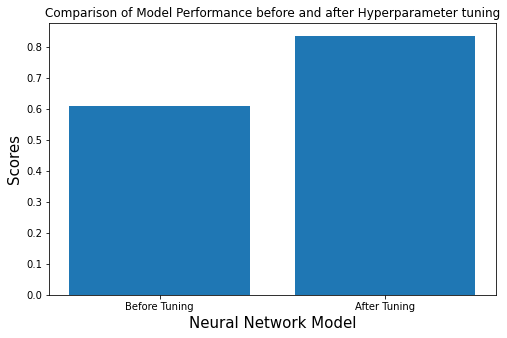

In [57]:
# Plot the graph
plt.figure(figsize=(8,5))
plt.bar(labels, scores_)
#Set up other properties e.g. label and title
plt.xlabel("Neural Network Model", size=15)
plt.ylabel("Scores", size=15)
plt.title("Comparison of Model Performance before and after Hyperparameter tuning")
plt.show()